# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

The exchange rate between two currencies is usually determined by each country's economic activity, market interest rates, gross domestic product and unemployment rate. Commonly referred to as market exchange rates, they are set in global financial markets where banks and other financial institutions trade currencies around the clock based on these factors. Rate changes can be made in small hourly or daily changes, or in large incremental shifts. In this project, we will try to visualize the movement of the Indonesian Rupiah (IDR) price toward US Dollars (USD).

---
Nilai tukar antara dua mata uang biasanya ditentukan oleh aktivitas ekonomi masing-masing negara, suku bunga pasar, produk domestik bruto, dan tingkat pengangguran. Biasanya disebut sebagai nilai tukar pasar, mereka ditetapkan di pasar keuangan global di mana bank dan lembaga keuangan lainnya memperdagangkan mata uang sepanjang waktu berdasarkan faktor-faktor ini. Perubahan tarif dapat dilakukan dalam perubahan kecil per jam atau harian, atau dalam perubahan bertahap yang besar. Dalam proyek ini, kami akan mencoba memvisualisasikan pergerakan harga Rupiah Indonesia (IDR) terhadap Dolar Amerika Serikat (USD).

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

#Menggunakan method prettify untuk memperbaiki tampilan HTML dan hanya menampilkan 500 karakter
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


In [37]:
table = soup.find('table')
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/6/2023
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-6-2023">
     15,607.20000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-6-2023">
     USD IDR rate for 1/6/2023
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/5/2023
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1


In [6]:
rows = []

# Mencari semua baris di tabel (tr atau table row) dengan for loop
data_rows = table.find_all('tr')

for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    # Remove data arrays that are empty
    if len(beautified_value) == 0:
        continue
    rows.append(beautified_value)

In [7]:
rows[1:10]

[['1/5/2023', 'Thursday', '15,635.20000 IDR', 'USD IDR rate for 1/5/2023'],
 ['1/4/2023', 'Wednesday', '15,581.95000 IDR', 'USD IDR rate for 1/4/2023'],
 ['1/3/2023', 'Tuesday', '15,594.30000 IDR', 'USD IDR rate for 1/3/2023'],
 ['1/2/2023', 'Monday', '15,554.00000 IDR', 'USD IDR rate for 1/2/2023'],
 ['12/30/2022', 'Friday', '15,534.30000 IDR', 'USD IDR rate for 12/30/2022'],
 ['12/29/2022', 'Thursday', '15,626.50000 IDR', 'USD IDR rate for 12/29/2022'],
 ['12/28/2022',
  'Wednesday',
  '15,788.95000 IDR',
  'USD IDR rate for 12/28/2022'],
 ['12/27/2022', 'Tuesday', '15,620.05955 IDR', 'USD IDR rate for 12/27/2022'],
 ['12/26/2022', 'Monday', '15,621.17514 IDR', 'USD IDR rate for 12/26/2022']]

In [8]:
#Menukar posisi atau urutan data (bagian bawah menjadi atas)
rows = rows[::-1]

In [9]:
#Menghitung jumlah baris pada tabel
len(data_rows)

130

# Creating data frame & Data wrangling

Setelah dilakukan scraping, maka hasil scrap tersebut akan disimpan dalam sebuat dataframe dengan memberikan nama kolom sesuai dengan yang diinginkan

In [10]:
import pandas as pd
df = pd.DataFrame(rows, columns = ['Tanggal','Hari','Harga_Harian','Keterangan'])
df

,Tanggal,Hari,Harga_Harian,Keterangan
0,7/11/2022,Monday,"15,010.52059 IDR",USD IDR rate for 7/11/2022
1,7/12/2022,Tuesday,"14,984.00000 IDR",USD IDR rate for 7/12/2022
2,7/13/2022,Wednesday,"15,030.45000 IDR",USD IDR rate for 7/13/2022
3,7/14/2022,Thursday,"15,045.60000 IDR",USD IDR rate for 7/14/2022
4,7/15/2022,Friday,"14,996.35000 IDR",USD IDR rate for 7/15/2022
...,...,...,...,...
125,1/2/2023,Monday,"15,554.00000 IDR",USD IDR rate for 1/2/2023
126,1/3/2023,Tuesday,"15,594.30000 IDR",USD IDR rate for 1/3/2023
127,1/4/2023,Wednesday,"15,581.95000 IDR",USD IDR rate for 1/4/2023
128,1/5/2023,Thursday,"15,635.20000 IDR",USD IDR rate for 1/5/2023


In [11]:
df.head()

,Tanggal,Hari,Harga_Harian,Keterangan
0,7/11/2022,Monday,"15,010.52059 IDR",USD IDR rate for 7/11/2022
1,7/12/2022,Tuesday,"14,984.00000 IDR",USD IDR rate for 7/12/2022
2,7/13/2022,Wednesday,"15,030.45000 IDR",USD IDR rate for 7/13/2022
3,7/14/2022,Thursday,"15,045.60000 IDR",USD IDR rate for 7/14/2022
4,7/15/2022,Friday,"14,996.35000 IDR",USD IDR rate for 7/15/2022


In [12]:
df.dtypes

Tanggal         object
Hari            object
Harga_Harian    object
Keterangan      object
dtype: object

Terdapat kolom data dengan tipe yang masih belum sesuai. Kolom tanggal seharusnya mempunyai tipe data datetime, dan harga harian mempunyai tipe data float.

In [13]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.dtypes

Tanggal         datetime64[ns]
Hari                    object
Harga_Harian            object
Keterangan              object
dtype: object

In [14]:
df['Harga_Harian'] = df['Harga_Harian'].str.replace('IDR', '')
df['Harga_Harian'] = df['Harga_Harian'].str.replace(',', '')
df.head()

,Tanggal,Hari,Harga_Harian,Keterangan
0,2022-07-11,Monday,15010.52059,USD IDR rate for 7/11/2022
1,2022-07-12,Tuesday,14984.00000,USD IDR rate for 7/12/2022
2,2022-07-13,Wednesday,15030.45000,USD IDR rate for 7/13/2022
3,2022-07-14,Thursday,15045.60000,USD IDR rate for 7/14/2022
4,2022-07-15,Friday,14996.35000,USD IDR rate for 7/15/2022


In [15]:
df['Harga_Harian'] = df['Harga_Harian'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       130 non-null    datetime64[ns]
 1   Hari          130 non-null    object        
 2   Harga_Harian  130 non-null    float64       
 3   Keterangan    130 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ KB


In [16]:
rupiah=df.loc[:, ['Tanggal','Harga_Harian']]
rupiah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       130 non-null    datetime64[ns]
 1   Harga_Harian  130 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


### Data Visualization

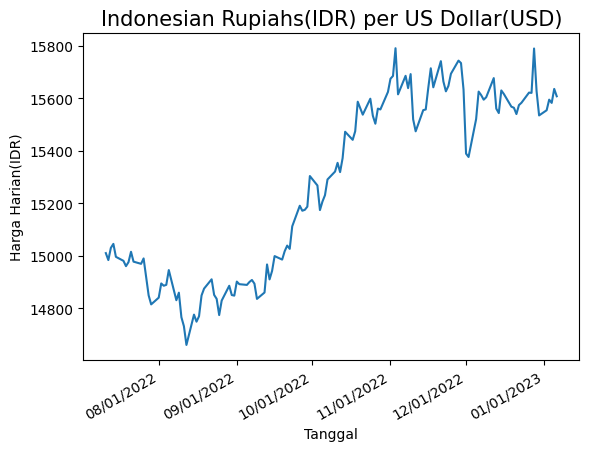

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x= rupiah['Tanggal']
y= rupiah['Harga_Harian']

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.plot(x,y)
plt.title('Indonesian Rupiahs(IDR) per US Dollar(USD)', fontsize=15, loc='center')
plt.xlabel("Tanggal")
plt.ylabel("Harga Harian(IDR)")
plt.gcf().autofmt_xdate()

In [18]:
rupiah.describe()

,Harga_Harian
count,130.000000
mean,15267.935393
std,340.052650
min,14661.076160
25%,14913.312500
50%,15311.175000
75%,15594.262500
max,15790.000000


In [19]:
#Nilai Rupiah paling rendah
rupiah.min()


Tanggal         2022-07-11 00:00:00
Harga_Harian            14661.07616
dtype: object

In [20]:
#Nilai Rupiah paling tinggi
rupiah.max()

Tanggal         2023-01-06 00:00:00
Harga_Harian                15790.0
dtype: object

## Conclusion

Grafik pergerakan kurs harga Indonesian Rupiahs terhadap US Dollar menunjukkan kenaikan pada rentang bulan September 2022  hingga awal tahun 2023. Harga IDR paling tinggi terdapat di bulan Januari 2023, sementara harga IDR paling rendah terdapat pada bulan Juli,2022. Kenaikan harga rupiah adalah indikasi bahwa nilai mata uang Indonesia semakin melemah terhadap nilai mata uang USD. Fenomena ini dapat disebabkan oleh berbagai faktor seperti inflasi, naiknya suku bunga acuan US dan situasi perdagangan global.